# Analysis of ``ad_hoc.dat`` sink particel data
### Do NOT run and update this notebook itself.   Instead, use the "Duplicate" option to make a copy, and use that!

Standard startup

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Adjust these to your local setup:

In [2]:
top='c:/cygwin64/home/codes/dispatch2_clean/'
data='f:/data/'
experiment='ISM'

Modules

In [3]:
import os
os.chdir(top+'experiments/'+experiment+'/python')
import sys
lib=top+'utilities/python'
if sys.path[0] != lib:
    sys.path.insert(0,lib)
import dispatch as dis
import dispatch.select as dse
import dispatch.graphics as dgr
import dispatch.particles as dpa
from scipy.io import FortranFile

## KDK reference
#### Code

In [4]:
GM=1.0
def mag(x):
    return sqrt(x[0]**2+x[1]**2)
def acc(r):
    r1=1./mag(r)
    return -GM*r1*r1*r1*r
def kdk(t,r,v,dt=0.1):
    v=v+0.5*dt*acc(r)
    r=r+dt*v
    t=t+dt
    a=acc(r)
    v=v+0.5*dt*a
    return t,r,v,a
def KDK(n,r0=1,v0=1):
    v_K=sqrt(GM/r0)
    P=2*pi*r0/v_K
    dt=P/n
    r=array([0.,r0])
    v=array([-v0,0.])
    t=0.0
    tt=[t]; rr=[r]; vv=[v]
    print('n=',n)
    for i in range(n):
        t,r,v,a=kdk(t,r,v,dt)
        tt.append(t)
        rr.append(r)
        vv.append(v)
        if i<5:
            print('  i={}   t={:.6e}   r={}   v={}  a={}'.format(i+1,t,r,v,a))
    rr=array(rr).transpose()
    plot(rr[0],rr[1],'-+'); plot(rr[0,0],rr[1,0],'o',label='0'); plot(rr[0,-1],rr[1,-1],'o',label='1')
    title('KDK n={}'.format(n)); legend();

n= 20
  i=1   t=3.141593e-01   r=[-0.31415927  0.95065198]   v=[-0.95083169 -0.30586388]  a=[ 0.31301517 -0.94718994]
  i=2   t=6.283185e-01   r=[-0.59742517  0.80782006]   v=[-0.80914025 -0.57975507]  a=[ 0.58902053 -0.79645556]
  i=3   t=9.424778e-01   r=[-0.82255708  0.58638112]   v=[-0.59127334 -0.79421659]  a=[ 0.79796334 -0.56884883]
  i=4   t=1.256637e+00   r=[-0.96893317  0.30879906]   v=[-0.32121432 -0.92969191]  a=[ 0.92128578 -0.29361383]
  i=5   t=1.570796e+00   r=[-1.02438199  0.00223847]   v=[-0.02680905 -0.97613976]  a=[ 0.95295638 -0.00208239]
n= 60
  i=1   t=1.047198e-01   r=[-0.10471976  0.99451689]   v=[-0.99451713 -0.10443031]  a=[ 0.10471503 -0.99447204]
  i=2   t=2.094395e-01   r=[-0.20829118  0.97812817]   v=[-0.97813013 -0.20770621]  a=[ 0.20825372 -0.97795224]
  i=3   t=3.141593e-01   r=[-0.30957885  0.951015  ]   v=[-0.95102301 -0.30868664]  a=[ 0.30945416 -0.95063197]
  i=4   t=4.188790e-01   r=[-0.40747297  0.91347699]   v=[-0.91349996 -0.40625714]  a=[ 0.40

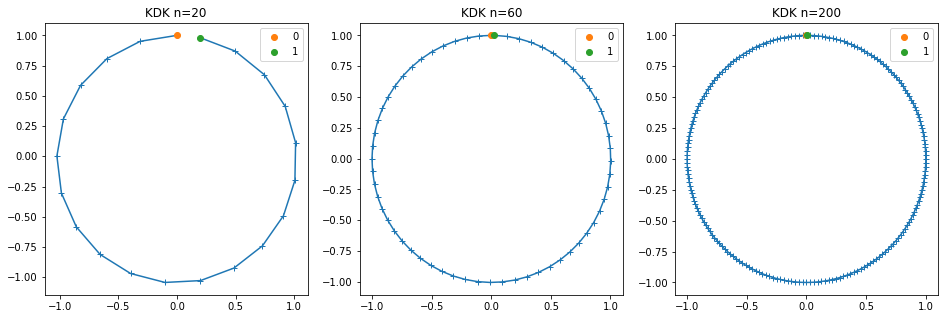

In [5]:
GM=1
figure(figsize=(16,5))
subplot(1,3,1); KDK(20)
subplot(1,3,2); KDK(60)
subplot(1,3,3); KDK(200)

``case1.nml`` parameters

M1=9.8329184e-03, a1=20.000, w1=20.000000, dt=0.001570796
M2=3.9331674e-02, a2=20.000, w2=20.000000
n= 20
  i=1   t=1.570796e-02   r=[-0.01570796  0.0475326 ]   v=[-0.95083169 -0.30586388]  a=[  6.2603035  -18.94379877]
  i=2   t=3.141593e-02   r=[-0.02987126  0.040391  ]   v=[-0.80914025 -0.57975507]  a=[ 11.78041066 -15.92911123]
  i=3   t=4.712389e-02   r=[-0.04112785  0.02931906]   v=[-0.59127334 -0.79421659]  a=[ 15.95926674 -11.37697668]
  i=4   t=6.283185e-02   r=[-0.04844666  0.01543995]   v=[-0.32121432 -0.92969191]  a=[18.42571561 -5.87227665]
  i=5   t=7.853982e-02   r=[-0.0512191   0.00011192]   v=[-0.02680905 -0.97613976]  a=[19.0591276 -0.0416478]
n= 60
  i=1   t=5.235988e-03   r=[-0.00523599  0.04972584]   v=[-0.99451713 -0.10443031]  a=[  2.09430066 -19.88944077]
  i=2   t=1.047198e-02   r=[-0.01041456  0.04890641]   v=[-0.97813013 -0.20770621]  a=[  4.16507435 -19.55904475]
  i=3   t=1.570796e-02   r=[-0.01547894  0.04755075]   v=[-0.95102301 -0.30868664]  a=[  6.18908

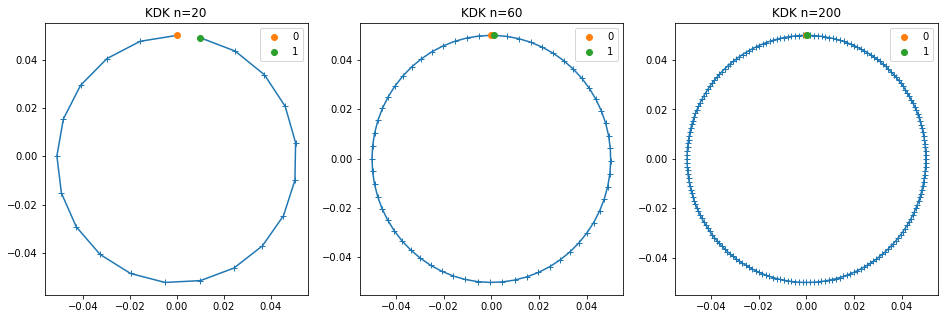

In [6]:
v0=1; r1=0.05; G=5.0849603133615489; 
M1=r1/G; GM=r1*v0**2
M2=4*M1; r2=2*r1
v1=  v0; a1=G*M1/r1**2
v2=2*v0; a2=G*M2/r2**2
aa1=G*M1/r1**3
aa2=G*M2/r2**3
w1=v1/r1
w2=a2/v1
n=200
dt=2*pi/(w1*n)
print('M1={:.7e}, a1={:.3f}, w1={:.6f}, dt={:.9f}'.format(M1,a1,w1,dt))
print('M2={:.7e}, a2={:.3f}, w2={:.6f}'.format(M2,a2,w2))
figure(figsize=(16,5))
subplot(1,3,1); KDK(20,r0=r1)
subplot(1,3,2); KDK(60,r0=r1)
subplot(1,3,3); KDK(200,r0=r1)

## DISPATCH case1 oribital elements

In [7]:
G=5.0849603133615489
M=0.05/1.594515**2
r=0.10
a=G*M/r**2
v=1.0
M=2*v**2*r/G
print('a:',a)
print('v:',v)
print('M:',M)

a: 10.000008147388906
v: 1.0
M: 0.03933167373488991


### Read procedure

In [8]:
class item():
    pass

def Read(run='',experiment='ISM'):
    name=data+experiment+'/'+run+'/ad_hoc.dat'
    sink={}
    with FortranFile(name) as fd:
        n=0
        while(1):
            n+=1
            try:
                id,nstep,dt,t,m,p,v,a=fd.read_record('i4,i4,f8,f8,f8,(3)f8,(3)f8,(3)f8')[0]
                if not id in sink.keys():
                    sink[id]=item()
                    s=sink[id]
                    s.t=[]
                    s.m=[]
                    s.p=[]
                    s.v=[]
                    s.a=[]
                s=sink[id]
                s.t.append(t)
                s.m.append(m)
                s.p.append(p)
                s.v.append(v)
                s.a.append(a)
            except:
                break
    for id in sink.keys():
        s=sink[id]
        s.t=array(s.t)
        s.m=array(s.m)
        s.p=array(s.p).transpose()
        s.v=array(s.v).transpose()
        s.a=array(s.a).transpose()
    print(n,'sink updates read')
    ids=list(sink.keys())
    ids.sort()
    print('sinks:',ids)
    return(sink)

In [9]:
run='case1'
sink=Read(run)

1287 sink updates read
sinks: [0, 1]


### Position time evolution

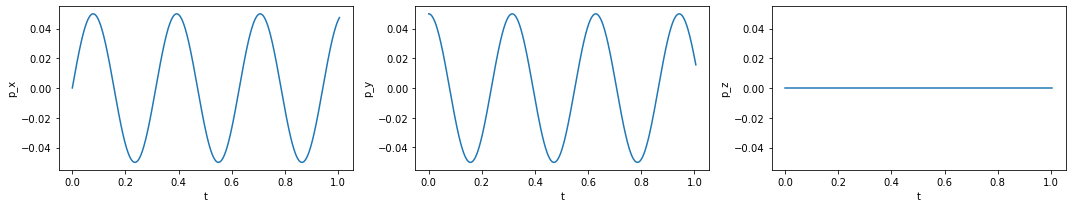

In [10]:
id=0
s=sink[id]
figure(figsize=(15,3))
subplot(1,3,1); plot(s.t,s.p[0]); xlabel('t'); ylabel('p_x');
subplot(1,3,2); plot(s.t,s.p[1]); xlabel('t'); ylabel('p_y');
subplot(1,3,3); plot(s.t,s.p[2]); xlabel('t'); ylabel('p_z');
tight_layout();

### Velocity time evolution

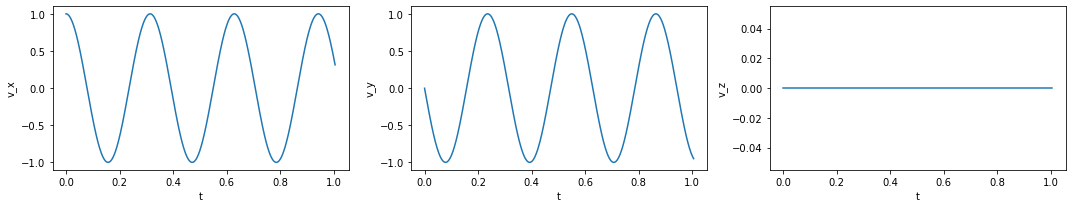

In [11]:
s=sink[id]
figure(figsize=(15,3))
subplot(1,3,1); plot(s.t,s.v[0]); xlabel('t'); ylabel('v_x');
subplot(1,3,2); plot(s.t,s.v[1]); xlabel('t'); ylabel('v_y');
subplot(1,3,3); plot(s.t,s.v[2]); xlabel('t'); ylabel('v_z');
tight_layout();

### Acceleration time evolution

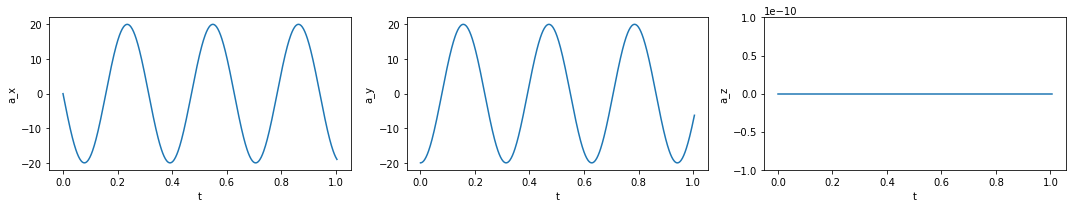

In [12]:
id=0
s=sink[id]
figure(figsize=(15,3))
subplot(1,3,1); plot(s.t,s.a[0]); xlabel('t'); ylabel('a_x');
subplot(1,3,2); plot(s.t,s.a[1]); xlabel('t'); ylabel('a_y');
subplot(1,3,3); plot(s.t,s.a[2]); xlabel('t'); ylabel('a_z'); ylim(-1e-10,1e-10);
tight_layout();

### Phase plots

In [13]:
run='case1'

1287 sink updates read
sinks: [0, 1]


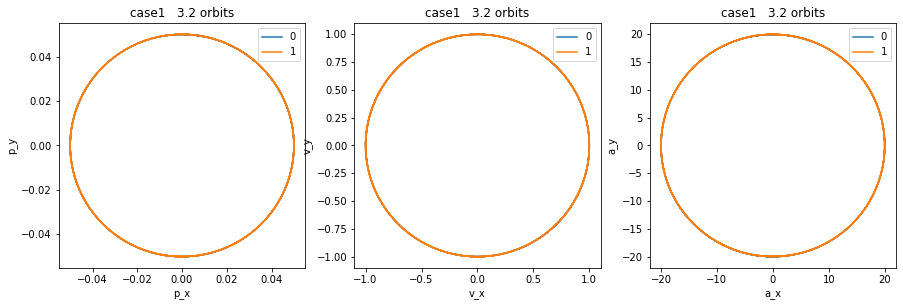

In [14]:
sink=Read(run)
figure(figsize=(15,4.5))
period=2*pi*0.05
orbits=s.t[-1]/period
txt='{}   {:.1f} orbits'.format(run,orbits)
subplot(1,3,1); 
for id in sink.keys():
    s=sink[id]; plot(s.p[0],s.p[1],label=id)
xlabel('p_x'); ylabel('p_y'); legend(); title(txt)

subplot(1,3,2)
for id in sink.keys():
    s=sink[id]; plot(s.v[0],s.v[1],label=id); legend(); title(txt)
xlabel('v_x'); ylabel('v_y');

subplot(1,3,3)
for id in sink.keys():
    s=sink[id]; plot(s.a[0],s.a[1],label=id); legend(); title(txt)
xlabel('a_x'); ylabel('a_y');